<a href="https://colab.research.google.com/github/SamaherUNIMI/DSE_SoccermentLab_FootballAnalytics/blob/main/Soccerment_Project_Corners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to use
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

# For regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
uploaded = files.upload()

Saving corner_stats.csv to corner_stats.csv


In [ ]:
corners = pd.read_csv('corner_stats.csv')

In [ ]:
# Check dataset's information
corners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               6537 non-null   int64  
 1   game_id               6537 non-null   int64  
 2   match_day             6537 non-null   int64  
 3   season                6537 non-null   int64  
 4   total_pass            6537 non-null   float64
 5   xG                    6537 non-null   float64
 6   xT_from_passes        6537 non-null   float64
 7   xT_from_carries       6537 non-null   float64
 8   total_tackle          6537 non-null   float64
 9   total_contest         6537 non-null   float64
 10  won_contest           6537 non-null   float64
 11  fouls                 6537 non-null   float64
 12  accurate_pass         6537 non-null   float64
 13  ball_recovery         6537 non-null   float64
 14  goal_kicks            6537 non-null   float64
 15  total_clearance      

In [ ]:
# Check columns
corners.head(5)

,team_id,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,total_contest,...,total_clearance,total_scoring_att,aerial_won,aerial_lost,total_long_balls,total_cross_nocorner,corner_taken,lost_corners,goals,team
0,1,2292818,1,2022,548.0,1.402391,0.217200,0.546908,12.0,12.0,...,10.0,17.0,11.0,9.0,54.0,19.0,6.0,2.0,0.0,Manchester United
1,1,2292822,2,2022,525.0,0.882110,0.489459,0.528431,12.0,11.0,...,22.0,15.0,14.0,10.0,36.0,19.0,2.0,8.0,0.0,Manchester United
2,1,2292836,3,2022,273.0,1.992808,0.427398,0.129990,24.0,18.0,...,34.0,13.0,14.0,20.0,57.0,2.0,6.0,8.0,2.0,Manchester United
3,1,2292848,4,2022,404.0,1.667937,0.423712,0.020603,14.0,14.0,...,36.0,11.0,26.0,19.0,61.0,9.0,3.0,5.0,1.0,Manchester United
4,1,2292855,5,2022,513.0,0.973243,0.702857,0.210308,15.0,14.0,...,10.0,9.0,16.0,18.0,69.0,10.0,3.0,1.0,1.0,Manchester United


In [ ]:
# Check unique values by attribute
corners.nunique()

team_id                  180
game_id                 3270
match_day                 41
season                     1
total_pass               577
xG                      6485
xT_from_passes          6484
xT_from_carries         6484
total_tackle              39
total_contest             46
won_contest               29
fouls                     29
accurate_pass            593
ball_recovery             67
goal_kicks                24
total_clearance           60
total_scoring_att         37
aerial_won                46
aerial_lost               47
total_long_balls          93
total_cross_nocorner      48
corner_taken              21
lost_corners              21
goals                      9
team                     180
dtype: int64

In [ ]:
# Delete games with information of only one team (lack information of the other team)
corners = corners.drop(corners[(corners['match_day'] == 0)].index)

In [ ]:
# Check again info, so we control if the drop worked correctly
corners.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6530 entries, 0 to 6536
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               6530 non-null   int64  
 1   game_id               6530 non-null   int64  
 2   match_day             6530 non-null   int64  
 3   season                6530 non-null   int64  
 4   total_pass            6530 non-null   float64
 5   xG                    6530 non-null   float64
 6   xT_from_passes        6530 non-null   float64
 7   xT_from_carries       6530 non-null   float64
 8   total_tackle          6530 non-null   float64
 9   total_contest         6530 non-null   float64
 10  won_contest           6530 non-null   float64
 11  fouls                 6530 non-null   float64
 12  accurate_pass         6530 non-null   float64
 13  ball_recovery         6530 non-null   float64
 14  goal_kicks            6530 non-null   float64
 15  total_clearance       6530

In [ ]:
# Look for a particular match
corners[corners['game_id'] == 2292818]

,team_id,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,total_contest,...,total_clearance,total_scoring_att,aerial_won,aerial_lost,total_long_balls,total_cross_nocorner,corner_taken,lost_corners,goals,team
0,1,2292818,1,2022,548.0,1.402391,0.217200,0.546908,12.0,12.0,...,10.0,17.0,11.0,9.0,54.0,19.0,6.0,2.0,0.0,Manchester United
533,36,2292818,1,2022,326.0,1.535517,0.557835,0.083352,14.0,12.0,...,24.0,15.0,9.0,11.0,66.0,10.0,2.0,6.0,2.0,Brighton and Hove Albion


In [ ]:
# Function to add the opponent's team_id, for future calculation
def get_team_id(row):
    id_game = row['game_id']
    id_team = row['team_id']
    opponent = corners[(corners['game_id'] == id_game) & (corners['team_id'] != id_team)]['team_id'].values
    return opponent[0] if len(opponent) > 0 else None

In [ ]:
# Add a new column "opponent" to add opponent's team_id
corners['opponent'] = corners.apply(get_team_id, axis=1)

In [ ]:
corners[pd.isnull(corners['opponent'])]

,team_id,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,total_contest,...,total_scoring_att,aerial_won,aerial_lost,total_long_balls,total_cross_nocorner,corner_taken,lost_corners,goals,team,opponent
1833,169,2364757,1,2022,449.0,0.0,0.0,0.0,14.0,16.0,...,18.0,16.0,9.0,54.0,17.0,7.0,3.0,3.0,VfB Stuttgart,NaN
1834,169,2364758,2,2022,328.0,0.0,0.0,0.0,5.0,17.0,...,9.0,10.0,20.0,50.0,2.0,3.0,5.0,3.0,VfB Stuttgart,NaN
4111,709,2364508,3,2022,344.0,0.0,0.0,0.0,18.0,20.0,...,10.0,18.0,18.0,63.0,6.0,1.0,7.0,2.0,FC Emmen,NaN
4112,709,2364510,4,2022,464.0,0.0,0.0,0.0,17.0,24.0,...,10.0,14.0,10.0,55.0,9.0,6.0,6.0,2.0,FC Emmen,NaN
4113,709,2364511,5,2022,406.0,0.0,0.0,0.0,13.0,29.0,...,12.0,15.0,9.0,58.0,12.0,5.0,4.0,0.0,FC Emmen,NaN
4114,709,2364512,6,2022,509.0,0.0,0.0,0.0,18.0,30.0,...,13.0,21.0,26.0,74.0,30.0,10.0,2.0,1.0,FC Emmen,NaN


In [ ]:
# Delete NaN values from the new column "opponent"
corners.dropna(subset=['opponent'], axis=0, inplace=True)

In [ ]:
# Check again info to control if the drop function worked correctly
corners.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6524 entries, 0 to 6536
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               6524 non-null   int64  
 1   game_id               6524 non-null   int64  
 2   match_day             6524 non-null   int64  
 3   season                6524 non-null   int64  
 4   total_pass            6524 non-null   float64
 5   xG                    6524 non-null   float64
 6   xT_from_passes        6524 non-null   float64
 7   xT_from_carries       6524 non-null   float64
 8   total_tackle          6524 non-null   float64
 9   total_contest         6524 non-null   float64
 10  won_contest           6524 non-null   float64
 11  fouls                 6524 non-null   float64
 12  accurate_pass         6524 non-null   float64
 13  ball_recovery         6524 non-null   float64
 14  goal_kicks            6524 non-null   float64
 15  total_clearance       6524

In [ ]:
# Transform opponent column into an integer, and position it as a second column, so we have both team_id together
opponent_index = corners.columns.get_loc('opponent')
opponent_column = corners.pop('opponent')
corners.insert(1, 'opponent', opponent_column)
corners['opponent'] = corners['opponent'].astype('int64')

In [ ]:
# Check first rows, just to see if transformation worked
corners.head(5)

,team_id,opponent,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,...,total_clearance,total_scoring_att,aerial_won,aerial_lost,total_long_balls,total_cross_nocorner,corner_taken,lost_corners,goals,team
0,1,36,2292818,1,2022,548.0,1.402391,0.217200,0.546908,12.0,...,10.0,17.0,11.0,9.0,54.0,19.0,6.0,2.0,0.0,Manchester United
1,1,94,2292822,2,2022,525.0,0.882110,0.489459,0.528431,12.0,...,22.0,15.0,14.0,10.0,36.0,19.0,2.0,8.0,0.0,Manchester United
2,1,14,2292836,3,2022,273.0,1.992808,0.427398,0.129990,24.0,...,34.0,13.0,14.0,20.0,57.0,2.0,6.0,8.0,2.0,Manchester United
3,1,20,2292848,4,2022,404.0,1.667937,0.423712,0.020603,14.0,...,36.0,11.0,26.0,19.0,61.0,9.0,3.0,5.0,1.0,Manchester United
4,1,13,2292855,5,2022,513.0,0.973243,0.702857,0.210308,15.0,...,10.0,9.0,16.0,18.0,69.0,10.0,3.0,1.0,1.0,Manchester United


In [ ]:
# Check correlations
numerical_columns = corners.select_dtypes(include=['int64', 'float64'])
corners_matrix = corners[['total_pass', 'xG', 'xT_from_passes', 'xT_from_carries', 'total_tackle', 'total_contest', 'won_contest', 'fouls', 'accurate_pass', 'ball_recovery',
                         'goal_kicks', 'total_clearance', 'total_scoring_att', 'aerial_won', 'aerial_lost', 'total_long_balls', 'total_cross_nocorner', 'corner_taken',
                         'lost_corners', 'goals']]
correlation_matrix = numerical_columns.corrwith(corners_matrix['corner_taken'])
correlation_matrix.sort_values()

total_clearance        -0.335318
goal_kicks             -0.290955
lost_corners           -0.285845
total_long_balls       -0.133607
fouls                  -0.096030
total_tackle           -0.076707
aerial_lost            -0.029719
team_id                -0.019249
match_day              -0.000761
game_id                -0.000611
ball_recovery           0.022646
goals                   0.046766
opponent                0.048554
aerial_won              0.075670
won_contest             0.138152
total_contest           0.151803
xT_from_carries         0.223850
xG                      0.288171
total_pass              0.297376
accurate_pass           0.300414
xT_from_passes          0.345735
total_cross_nocorner    0.474468
total_scoring_att       0.555562
corner_taken            1.000000
season                       NaN
dtype: float64

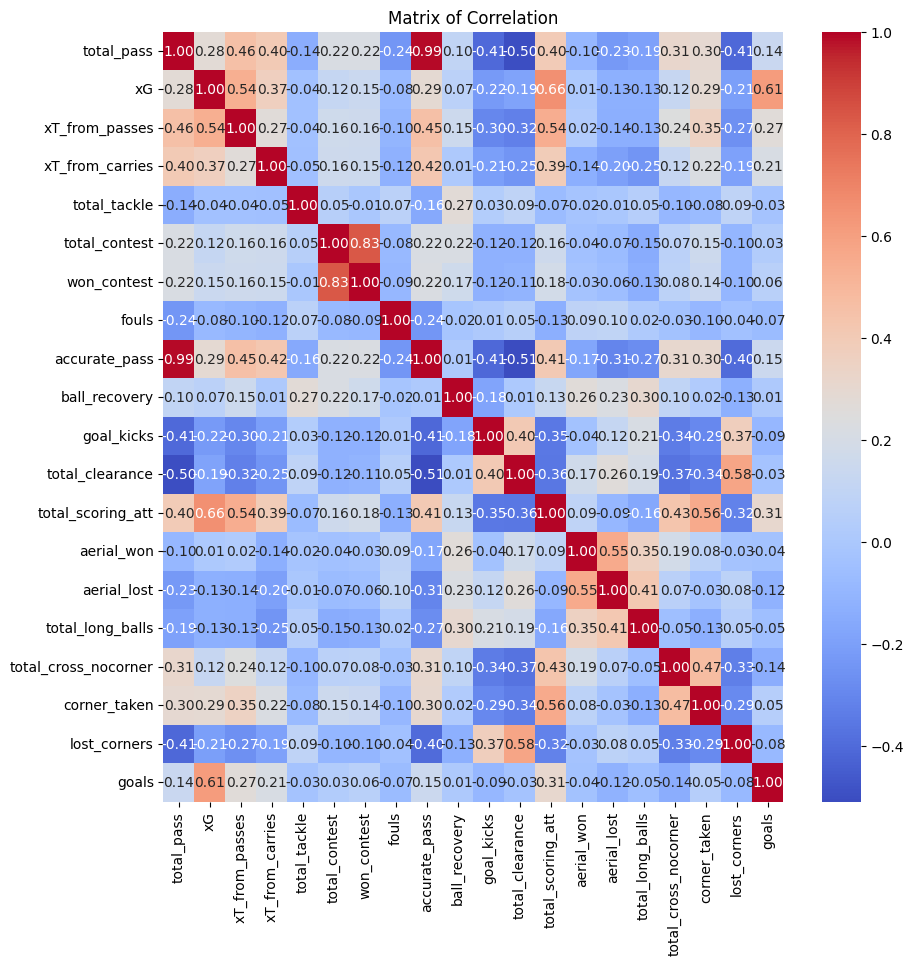

In [ ]:
# Calculation of correlation matrix
correlation_matrix = corners_matrix.corr(method='pearson')

# Heatmap of correlations
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix of Correlation')
plt.show()

Regarding the correlation values, we are going to concentrate in:

**Positive correlation:**

**Highly correlated with corners_taken (>=0,4):**
- total_scoring_att
- total_cross_nocorner

**Intermediate correlation with corners_taken (0,3 <= x < 0,4):**
- total_pass
- xG
- xT_from_passes
- accurate_pass

**Acceptable correlation with corners_taken (0,15 < x < 0,3):**
- xT_from_carries
- total_contest
- won_contest

**Negative correlation:**

**Intermediate correlation with corners_taken (x <= -0,3):**
- goal_kicks
- total_clearance

In [ ]:
# Add more variables
corners['pass_accuracy'] = corners['accurate_pass'] / corners['total_pass'] # Having a greater pass_accuracy should increase the probability of having a corner

corners['won_contest_accuracy'] = corners['won_contest'] / corners['total_contest'] # This measures the probability of winning a contest, so this should increase the chances of getting a corner

corners['outperformance'] = np.where(corners['xG'] == 0, 0, corners['goals'] / corners['xG']) # This measures the outperformance of a team, so we believe that a lower outperformance should increase probability of a corner
# However, the number and quality of chances varies enormously from team to team.
# So the uncertainty in our measure of outperformance will be larger for some teams than teams.

In [ ]:
# Check first rows, just to see if it worked
corners.head(5)

,team_id,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,total_contest,...,total_long_balls,total_cross_nocorner,corner_taken,lost_corners,goals,team,opponent,pass_accuracy,won_contest_accuracy,outperformance
0,1,2292818,1,2022,548.0,1.402391,0.217200,0.546908,12.0,12.0,...,54.0,19.0,6.0,2.0,0.0,Manchester United,36.0,0.824818,0.416667,0.000000
1,1,2292822,2,2022,525.0,0.882110,0.489459,0.528431,12.0,11.0,...,36.0,19.0,2.0,8.0,0.0,Manchester United,94.0,0.845714,0.909091,0.000000
2,1,2292836,3,2022,273.0,1.992808,0.427398,0.129990,24.0,18.0,...,57.0,2.0,6.0,8.0,2.0,Manchester United,14.0,0.659341,0.611111,1.003609
3,1,2292848,4,2022,404.0,1.667937,0.423712,0.020603,14.0,14.0,...,61.0,9.0,3.0,5.0,1.0,Manchester United,20.0,0.740099,0.500000,0.599543
4,1,2292855,5,2022,513.0,0.973243,0.702857,0.210308,15.0,14.0,...,69.0,10.0,3.0,1.0,1.0,Manchester United,13.0,0.779727,0.571429,1.027493


In [ ]:
# Add possesion variable, as we assume higher possesion tends to higher possibility of generating a corner
columns_to_sum = ['total_pass', 'ball_recovery', 'won_contest']
corners['denominator'] = corners.groupby('game_id')[columns_to_sum].transform('sum').sum(axis=1)

corners['possession'] = (corners['total_pass'] + corners['won_contest'] + corners['ball_recovery']) / corners['denominator']

In [ ]:
# Check that there is no na in the new column
corners[corners['possession'].isna()]

,team_id,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,total_contest,...,corner_taken,lost_corners,goals,team,opponent,pass_accuracy,won_contest_accuracy,outperformance,denominator,possession


In [ ]:
corners.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6524 entries, 0 to 6536
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               6524 non-null   int64  
 1   game_id               6524 non-null   int64  
 2   match_day             6524 non-null   int64  
 3   season                6524 non-null   int64  
 4   total_pass            6524 non-null   float64
 5   xG                    6524 non-null   float64
 6   xT_from_passes        6524 non-null   float64
 7   xT_from_carries       6524 non-null   float64
 8   total_tackle          6524 non-null   float64
 9   total_contest         6524 non-null   float64
 10  won_contest           6524 non-null   float64
 11  fouls                 6524 non-null   float64
 12  accurate_pass         6524 non-null   float64
 13  ball_recovery         6524 non-null   float64
 14  goal_kicks            6524 non-null   float64
 15  total_clearance       6524

In [ ]:
# New dataset we are going to use, according the correlation analysed before and the new variables created
df_corners = corners[['team_id', 'opponent', 'game_id', 'match_day', 'season', 'total_pass', 'accurate_pass', 'pass_accuracy', 'xG', 'goals', 'outperformance', 'xT_from_passes',
                      'xT_from_carries', 'total_contest', 'won_contest', 'won_contest_accuracy', 'total_scoring_att', 'total_cross_nocorner', 'goal_kicks', 'total_clearance',
                      'possession', 'corner_taken', 'lost_corners', 'team']]

In [ ]:
# Check new df
df_corners.head(5)

,team_id,opponent,game_id,match_day,season,total_pass,accurate_pass,pass_accuracy,xG,goals,...,won_contest,won_contest_accuracy,total_scoring_att,total_cross_nocorner,goal_kicks,total_clearance,possession,corner_taken,lost_corners,team
0,1,36.0,2292818,1,2022,548.0,452.0,0.824818,1.402391,0.0,...,5.0,0.416667,17.0,19.0,11.0,10.0,0.608309,6.0,2.0,Manchester United
1,1,94.0,2292822,2,2022,525.0,444.0,0.845714,0.882110,0.0,...,10.0,0.909091,15.0,19.0,6.0,22.0,0.653587,2.0,8.0,Manchester United
2,1,14.0,2292836,3,2022,273.0,180.0,0.659341,1.992808,2.0,...,11.0,0.611111,13.0,2.0,16.0,34.0,0.322097,6.0,8.0,Manchester United
3,1,20.0,2292848,4,2022,404.0,299.0,0.740099,1.667937,1.0,...,7.0,0.500000,11.0,9.0,13.0,36.0,0.522453,3.0,5.0,Manchester United
4,1,13.0,2292855,5,2022,513.0,400.0,0.779727,0.973243,1.0,...,8.0,0.571429,9.0,10.0,8.0,10.0,0.467451,3.0,1.0,Manchester United


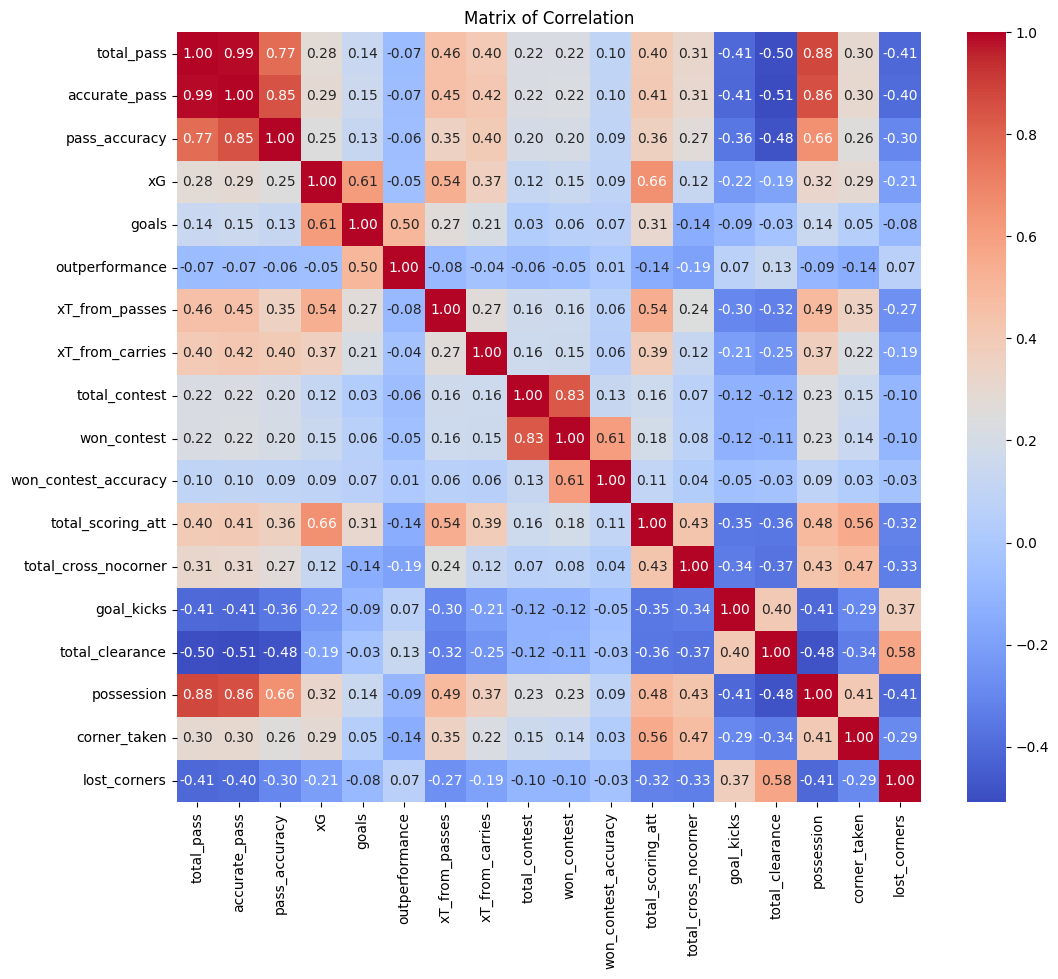

In [ ]:
# Check again correlation
numerical_columns2 = df_corners.select_dtypes(include=['int64', 'float64'])
df_corners_matrix = df_corners[['total_pass', 'accurate_pass', 'pass_accuracy', 'xG', 'goals', 'outperformance', 'xT_from_passes', 'xT_from_carries', 'total_contest', 'won_contest',
                          'won_contest_accuracy', 'total_scoring_att', 'total_cross_nocorner', 'goal_kicks', 'total_clearance', 'possession', 'corner_taken', 'lost_corners']]

# Calculation of correlation matrix
correlation_matrix_2 = df_corners_matrix.corr(method='pearson')

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix of Correlation')
plt.show()

In [ ]:
uploaded = files.upload()

Saving corners_final.csv to corners_final.csv


In [ ]:
corners = pd.read_csv('corners_final.csv')

In [ ]:
corners.head(5)

,team_id,opponent,game_id,match_day,season,total_pass,xG,xT_from_passes,xT_from_carries,total_tackle,...,corner_taken,lost_corners,goals,team,pass_accuracy,won_contest_accuracy,outperformance,denominator,possession,prev_3_corners
0,1,14,2292836,3,2022,273,1.992808,0.427398,0.129990,24,...,6,8,2,Manchester United,0.659341,0.611111,1.003609,1068,0.322097,4.666667
1,1,20,2292848,4,2022,404,1.667937,0.423712,0.020603,14,...,3,5,1,Manchester United,0.740099,0.500000,0.599543,913,0.522453,3.666667
2,1,13,2292855,5,2022,513,0.973243,0.702857,0.210308,15,...,3,1,1,Manchester United,0.779727,0.571429,1.027493,1275,0.467451,4.000000
3,1,3,2292865,6,2022,310,1.878432,0.236235,0.274033,17,...,2,5,3,Manchester United,0.780645,0.272727,1.597077,890,0.407865,2.666667
4,1,31,2292872,7,2022,626,1.511056,0.692850,0.398797,32,...,3,3,1,Manchester United,0.813099,0.166667,0.661789,1215,0.595062,2.666667


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = corners[['xG', 'xT_from_passes', 'total_contest', 'fouls', 'ball_recovery', 'goal_kicks', 'total_clearance', 'total_scoring_att', 'aerial_won', 'total_long_balls', 'total_cross_nocorner', 'lost_corners', 'goals', 'pass_accuracy', 'won_contest_accuracy', 'possession', 'prev_3_corners']]
y = corners['corner_taken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 3.8346266263882285
R^2 Score: 0.5534691636959961
Coefficients: [-1.70749541e-01  3.88122174e-01  2.31801018e-02 -2.86454324e-02
 -3.34271268e-02 -2.29465999e-02 -9.23371516e-03  1.75182810e-01
 -1.10323041e-02 -5.43211416e-03  8.13934586e-02 -2.31994382e-02
 -8.40429935e-02 -5.58450867e+00 -5.22705761e-01  2.59699776e+00
  6.96711597e-01]
Intercept: 4.659658470211433


In [ ]:
# Matches dictionary

matches_dictionary = corners[['game_id', 'match_day', 'team_id', 'opponent', 'team']].drop_duplicates(subset='game_id').set_index('match_day')
matches_dictionary

,game_id,team_id,opponent,team
match_day,,,,
3,2292836,1,14,Manchester United
4,2292848,1,20,Manchester United
5,2292855,1,13,Manchester United
6,2292865,1,3,Manchester United
7,2292872,1,31,Manchester United
...,...,...,...,...
21,2261267,14880,16629,Inter Miami CF
19,2261242,15154,16629,Nashville SC
29,2261388,15154,15296,Nashville SC


In [ ]:
# teams dictionary
opponent_dictionary = corners[['team_id', 'team']].drop_duplicates()

opponent_dictionary

,team_id,team
0,1,Manchester United
36,2,Leeds United
72,3,Arsenal
108,4,Newcastle United
144,6,Tottenham Hotspur
...,...,...
5988,11690,Los Angeles Football Club
6023,14880,Inter Miami CF
6056,15154,Nashville SC
6089,15296,Austin FC


In [ ]:
# Link coeficients to variables for further calculation
variables = ['Intercept', 'xG', 'xT_from_passes', 'total_contest', 'fouls', 'ball_recovery', 'goal_kicks', 'total_clearance', 'total_scoring_att',
             'aerial_won', 'total_long_balls', 'total_cross_nocorner', 'lost_corners', 'goals', 'pass_accuracy', 'won_contest_accuracy', 'possession', 'prev_3_corners']

data = {'Variables': [model.intercept_] + list(model.coef_)}

df_coefficient = pd.DataFrame(data, index=variables).T

df_coefficient

,Intercept,xG,xT_from_passes,total_contest,fouls,ball_recovery,goal_kicks,total_clearance,total_scoring_att,aerial_won,total_long_balls,total_cross_nocorner,lost_corners,goals,pass_accuracy,won_contest_accuracy,possession,prev_3_corners
Variables,4.659658,-0.17075,0.388122,0.02318,-0.028645,-0.033427,-0.022947,-0.009234,0.175183,-0.011032,-0.005432,0.081393,-0.023199,-0.084043,-5.584509,-0.522706,2.596998,0.696712


In [ ]:
# Weighted mean function
def weighted_mean(group):
    weights = np.exp(-0.1 * (len(group) - group['match_day'].values))
    weighted_values = group[['xG', 'xT_from_passes', 'total_contest', 'fouls', 'ball_recovery', 'goal_kicks', 'total_clearance', 'total_scoring_att',
             'aerial_won', 'total_long_balls', 'total_cross_nocorner', 'lost_corners', 'goals', 'pass_accuracy', 'won_contest_accuracy', 'possession', 'prev_3_corners']].values
    weighted_mean = np.average(weighted_values, axis=0, weights=weights)
    return weighted_mean

In [ ]:
# Estimate corners using the regression results and the avergae values by team until a given match
def estimated_corner():
  desired_match = input("Enter the desired match day number: ")
  desired_match = int(desired_match)

  if desired_match in corners['match_day'].unique() and desired_match > 3:
    df_filter = corners[corners['match_day'] < desired_match]

    average_grouped = df_filter.groupby('team_id').apply(weighted_mean)

    average_df = pd.DataFrame(average_grouped.tolist(), index=average_grouped.index,
                                  columns=['xG', 'xT_from_passes', 'total_contest', 'fouls', 'ball_recovery', 'goal_kicks', 'total_clearance', 'total_scoring_att',
             'aerial_won', 'total_long_balls', 'total_cross_nocorner', 'lost_corners', 'goals', 'pass_accuracy', 'won_contest_accuracy', 'possession', 'prev_3_corners'])

# Multiply each variable by the coefficient
    estimated_corners = pd.DataFrame(columns=average_df.columns)
    for team_id, row in average_df.iterrows():
      temporal_result = row * df_coefficient.iloc[0]
      temporal_result['team_id'] = team_id
      estimated_corners = pd.concat([estimated_corners, temporal_result.to_frame().transpose()], ignore_index=True)

    estimated_corners.drop('Intercept', axis=1, inplace=True)

# Now we sum all values + intercept
    estimated_corners['estimated_corners'] = estimated_corners.drop('team_id', axis=1).sum(axis=1) + df_coefficient['Intercept'].iloc[0]

    final_estimation = estimated_corners[['team_id', 'estimated_corners']]

# Now we add the calculated values to the matches
    final_corner_estimation = matches_dictionary[matches_dictionary.index == desired_match].join(final_estimation.set_index('team_id'), on='team_id', how='left', rsuffix='_team')

    final_corner_estimation = final_corner_estimation.join(final_estimation.set_index('team_id'), on='opponent', how='left', rsuffix='_opponent')

    final_corner_estimation['corners_estimation'] = final_corner_estimation['estimated_corners'] + final_corner_estimation['estimated_corners_opponent']

    final_corner_estimation.drop(['estimated_corners', 'estimated_corners_opponent'], axis=1, inplace=True)

# Now we add the opponent's names

    final_corner_estimation = final_corner_estimation.merge(opponent_dictionary, left_on='opponent', right_on='team_id', how='left').drop(columns=['team_id_y'])

    return final_corner_estimation[['game_id', 'team_id_x', 'team_x', 'opponent', 'team_y', 'corners_estimation']].rename(columns={'team_id_x': 'team_1', 'team_x': 'team_1_name',
                                                                                                                    'opponent': 'team_2', 'team_y': 'team_2_name'})

  else:
    return "Invalid match day"

In [ ]:
estimated_corner()

Enter the desired match day number: 25


,game_id,team_1,team_1_name,team_2,team_2_name,corners_estimation
0,2293056,1,Manchester United,94,Brentford,8.399287
1,2293054,2,Leeds United,20,Southampton,9.209406
2,2293055,3,Arsenal,13,Leicester City,10.328264
3,2293057,4,Newcastle United,36,Brighton and Hove Albion,13.352242
4,2293058,6,Tottenham Hotspur,8,Chelsea,10.659641
...,...,...,...,...,...,...
85,2308678,2847,Rio Ave,3084,Santa Clara,7.938011
86,2261338,6977,Minnesota United FC,15154,Nashville SC,10.099684
87,2261333,9668,New York City FC,14880,Inter Miami CF,9.264547
88,2261327,11091,Atlanta United,11504,FC Cincinnati,10.911026


In [ ]:
final_corner_estimation

NameError: name 'final_corner_estimation' is not defined

In [ ]:
# Estimate corners using the regression results and the avergae values by team until a given match
def avg_history():
  desired_match = input("Enter the desired match day number: ")
  desired_match = int(desired_match)

  if desired_match in corners['match_day'].unique() and desired_match > 3:
    df_filter = corners[corners['match_day'] < desired_match]

    average_grouped = df_filter.groupby(['team_id', 'game_id']).apply(weighted_mean)

    average_df = pd.DataFrame(average_grouped.tolist(), index=average_grouped.index,
                                  columns=['xG', 'xT_from_passes', 'total_contest', 'fouls', 'ball_recovery', 'goal_kicks', 'total_clearance', 'total_scoring_att',
             'aerial_won', 'total_long_balls', 'total_cross_nocorner', 'lost_corners', 'goals', 'pass_accuracy', 'won_contest_accuracy', 'possession', 'prev_3_corners'])

    return average_df

  else:
    return "Invalid match day"

In [ ]:
# Regression with df_corners
X = df_corners.drop(['team_id', 'game_id', 'match_day', 'season', 'team', 'corner_taken'], axis=1)
y = df_corners['corner_taken']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

# Optionally, you can print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 4.5864508913701005
R^2 Score: 0.37692949361580486
Coefficients: [ 1.49688457e-05 -2.14217484e-02  1.85586556e-02 -6.57991482e+00
 -1.64966449e-01 -1.40794723e-01  3.18435720e-02  5.07994898e-01
  4.22525516e-02  1.57294095e-02  1.03663751e-02 -5.74216755e-01
  2.27853775e-01  8.66292135e-02 -1.86427407e-02 -2.09762795e-02
  8.06962718e+00 -4.52830945e-02]
Intercept: 5.692378774842468


In [ ]:
# Check that doing mean works
#def avg_history():
#  desired_match = input("Enter the desired match day number: ")
#  desired_match = int(desired_match)

#  if desired_match in corners['match_day'].unique():
#    df_filter = corners[corners['match_day'] < desired_match]
#    average = df_filter.groupby('team_id')[['total_pass', 'xG', 'xT_from_passes', 'xT_from_carries', 'total_tackle',
#       'total_contest', 'won_contest', 'fouls', 'accurate_pass',
#       'ball_recovery', 'goal_kicks', 'total_clearance', 'total_scoring_att',
#       'aerial_won', 'aerial_lost', 'total_long_balls', 'total_cross_nocorner',
#       'corner_taken', 'lost_corners', 'goals', 'pass_accuracy',
#       'won_contest_accuracy', 'outperformance', 'denominator', 'possession']].mean()
#    return average

#  else:
#    return "Invalid match day"

In [ ]:
#avg_history()